# Tools and Methods of Data Analysis
## Session 7 - Part 1

Niels Hoppe <<niels.hoppe.extern@srh.de>>

### The Idea of Hypothesis Testing

Does the data support a **hypothesis** or not?

A hypothesis is **accepted** or **rejected** based on the test result.

Tests give **no absolute certainty**, but only a **probability of error**.

### The Idea of Hypothesis Testing (cont.)

1. What is the question (hypothesis)?
2. Which test is applicable?
3. How to perform the test?
4. How to interpret the result?

### 1. What is the question (hypothesis)?

A hypothesis is a claim (assumption) about a **population parameter**, e.g.,

Assumption about the **population mean** $\mu$:

"The average income in a country has fallen in the past 20 years."

Assumption about the **population proportion** $\pi$:

"The proportion of voters for a particular party has increased since the last election."

### 1. What is the question (hypothesis)?

There are three kinds of hypotheses we learn to test for:

* the parameter has **increased** wrt. a reference value
* the parameter has **decreased** wrt. a reference value
* the parameter has **changed** (increased or decreased) wrt. a reference value

There are always two hypothesis:

* The **null-hypothesis** ($H_0$) expresses the **absence** of the assumed effect.
* The **alternative hypothesis** ($H_1$) expresses the **presence** of the assumed effect.

### 1. What is the question (hypothesis)?

When testing for an **increase** of a population parameter $p$ with regard to a reference value $p_0$, the hypotheses look like this:

$$H_0: p \le p_0$$
$$H_1: p \gt p_0$$

We call this a **one-sided** test.

### 1. What is the question (hypothesis)?

When testing for an **decrease** of a population parameter $p$ with regard to a reference value $p_0$, the hypotheses look like this:

$$H_0: p \ge p_0$$
$$H_1: p \lt p_0$$

We call this a **one-sided** test.

### 1. What is the question (hypothesis)?

When testing for a **change** of a population parameter $p$ with regard to a reference value $p_0$, the hypotheses look like this:

$$H_0: p = p_0$$
$$H_1: p \ne p_0$$

We call this a **two-sided** test.

### Example: Fuel Consumption

A certain type of an engine currently in use has an average fuel consumption of 8 l/100 km.

Claim: A new type engine has an average fuel consumption less than 8 l/100 km.

$\mu_0 = 8 \text{l/100km}$ .

$\mu \lt 8 \text{l/100km}$ ?

### Example: Fuel Consumption (cont.)

H0 refers to the status quo of the assumption to be tested, i.e. no change.

H1 is the hypothesis that the researcher is trying to prove. It represents a significant change.

* $H_0: \mu \ge \mu_0 = 8 l/100km$
* $H_1: \mu \lt \mu_0 = 8 l/100km$

We use a sample to check the hypotheses.

### Example: Fuel Consumption (cont.)

The problem with samples.
Population with a mean $\mu = 8 l/100 km$:

In [36]:
data = [8.1, 7.5, 7.3, 8.0, 8.1, 7.8, 8.7, 8.3, 8.2]

* $\bar{x} = 7.6$ for `sample = [7.5, 7.3, 8.0]`
* $\bar{x} = 8.4$ for `sample = [8.7, 8.3, 8.2]`

### 2. Which test is applicable?

Many statistical tests exist, but we will focus on two of them:

* Student's **t-test** for hypotheses about the mean $\mu$
* **Z-test** for hypotheses about the proportion $\pi$

#### When to use Student's t-test

The following hypotheses about the population mean $\mu$ and a reference value $\mu_0$ can be tested using Student's t-test:

* $H_1: \mu \lt \mu_0$ , i.e., the mean is less than the reference value; left-sided test
* $H_1: \mu \gt \mu_0$ , i.e., the mean is greater than the reference value; right-sided test
* $H_1: \mu \ne \mu_0$ , i.e., the mean is different from the reference value; two-sided test

#### When to use Z-test for proportions

The following hypotheses about a proportion $\pi$ and a reference value $\pi_0$ can be tested using the Z-test for proportions:

* $H_1: \pi \lt \pi_0$ , i.e., the proportion is less than the reference value; left-sided test
* $H_1: \pi \gt \pi_0$ , i.e., the proportion is greater than the reference value; right-sided test
* $H_1: \pi \ne \pi_0$ , i.e., the proportion is different from the reference value; two-sided test

### 3. How to perform the test?

The general procedure is:

1. Calculate a test statistics / summary statistics from the data
2. Calculate a p-value from the test statistics

The calculation of the test statistics is specific to the respective test.

#### What is a "p-value"?

* The test statistics is known to follow a certain theoretical distribution, e.g., the normal distribution.
* The "p-value" is
  - the **probability** of obtaining a sample resulting in a given test statistics **under the condition** that the null-hypothesis is correct, i.e., $\text{p-value} = P(t | H_0)$
  - the **probability** of making an error when rejecting the null-hypothesis.

#### Calculating the p-value

* The p-value is calculated based on the theoretical distribution of the test statistics.
* We use the **inverse cumulative density function** aka. **survival function** of the distribution, i.e.,

$$1 - CDF = SF$$

* The p-value is calculated as

$$\text{p-value} = \begin{cases}
SF(t)         & \text{when left-sided}\\
1 - SF(t)     & \text{when right-sided}\\
2 \cdot SF(t) & \text{when two-sided} \\
\end{cases}$$

#### Calculating the p-value (cont.)

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

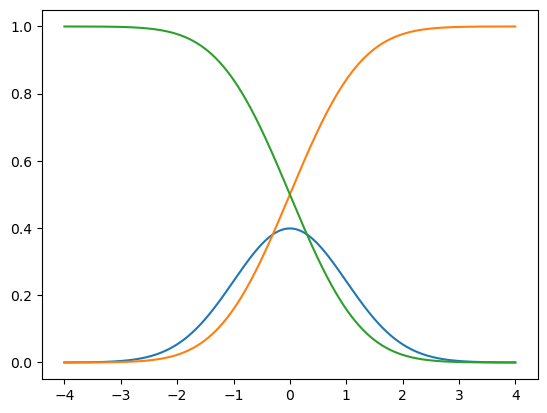

In [38]:

x = np.arange(-4, 4, 0.001)
plt.plot(x, stats.norm.pdf(x, loc=0, scale=1))
plt.plot(x, stats.norm.cdf(x, loc=0, scale=1))
plt.plot(x, stats.norm.sf(x, loc=0, scale=1)); None

### Student's t-test for means

Calculating the test statistics for Student's t-test:

$$t = \frac{\bar{x} - \mu_0}{s / \sqrt{n}}$$

Calculate the p-value based on the t-distribution with $n - 1$ degrees of freedom.

In [39]:
from scipy.stats import ttest_1samp

stat, pval = ttest_1samp(data, popmean=8.0, alternative='less')
pval

0.5

### Z-test for proportions

Calculating the test statistics for proportions z-test:

$$z = (p - p_0) \div \sqrt{\frac{p_0 \cdot (1 - p_0)}{n}}$$

Calculate the p-value based on the normal distribution.

In [40]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest(count=16, nobs=200, value=0.1,
                               alternative='smaller')
pval

0.1485732651742352

### 4. How to interpret the result?

Based on the p-value and the desired level of significance $\alpha$, we make a decision:

| p-value | $H_0$ | $H_1$ |
|-|-|-|
| $\lt \alpha$ | reject | accept |
| $\ge \alpha$ | accept | reject |

#### Errors in Making Decisions

Our test decision is ultimately based on the result of a sample.

This **can** lead to two types of errors (wrong decisions) if the samples are biased:

| p-value | $H_0$ | $H_1$ | Possible error |
|-|-|-|-|
| $\lt \alpha$ | reject | accept | Type I aka. $\alpha$  when $H_0$ is actually true |
| $\ge \alpha$ | accept | reject | Type II aka. $\beta$ when $H_0$ is actually false |

### Further Examples

#### Test for Reduction of Mean μ of a Population

Sample of cars with the new engine:

In [41]:
import pandas as pd

new = pd.Series([7.9, 8.2, 8.1, 7.9, 7.8, 7.9, 8.0, 7.8, 7.9, 7.9])
new.mean()

7.94

Do we have, with this result of a sample of 10 cars, the proof of a significant reduction of the mean $\mu$ of all cars of this type?
Level of significance $\alpha  = 5\%$.

In [42]:
stat, pval = ttest_1samp(new, popmean=8, alternative='less')
pval

0.08392532802853826

$\text{p-value} \gt \alpha = 0.05$: $H_0$ **can not** be rejected.

#### Example: Mean Lifespan of a Product

The lifespan of a product is approximately normally distributed with an average value of 50 months.
By using a new material, we intend to increase the average lifespan of the product.
What are the hypotheses? Level of significance $\alpha = 0.05$.

* $H_0: \mu \le \mu_0 = 50$
* $H_1: \mu \gt \mu_0 = 50$

In [43]:
x = [50, 54, 52, 52, 48, 53, 53, 51, 52, 52, 51, 51]
stat, pval = ttest_1samp(a=x, popmean=50, alternative='greater')
pval

0.0024577593105012127

$\text{p-value} \lt \alpha = 0.05$: $H_0$ **can** be rejected. Mean lifespan is greater than 50 months.

#### Example: Passengers

In the past, an airport handled an average of 6,000 passengers per day.
In order to ensure service quality on the one hand and to minimize costs on the other hand,
we want to examine whether this average number has changed.
Test with $\alpha = 5\%$.

* $H_0: \mu = \mu_0 = 6000$
* $H_1: \mu \ne \mu_0 = 6000$

In [44]:
from scipy import stats

x = [6204 , 6294 , 6480 , 6186 , 6493 , 5921 , 6388 , 6072]
stat, pval = stats.ttest_1samp(a=x, popmean=6000)
pval

0.008625321343415048

#### Example: Test of Proportions π

The proportion of defective parts in a production was up to now 10%.
We want to reduce the proportion of defective parts with a new production technology.
In a sample of 200 parts from the new production, 16 defective parts were found.

$$p = 16 / 200 = 8\%$$

This is an indication of the reduction,
but not yet proof of a significant reduction in the proportion of defective parts in the entire production. 
Test with $\alpha = 5\%$.

* $H_0: \pi \ge \pi_0 = 10\%$
* $H_1: \pi \lt \pi_0 = 10\%$

#### Test of Proportions π with Python

In [45]:
stat, pval = proportions_ztest(count=16, nobs=200, value=0.1, alternative='smaller')
pval

0.1485732651742352

$\text{p-value} \gt \alpha = 0.05$: $H_0$ **can not** be rejected.

#### Effect of Large Sample Sizes

In [46]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest(count=160, nobs=2000, value=0.1, alternative='smaller')
pval

0.0004887873855964199

$\text{p-value} \lt \alpha = 0.05$: $H_0$ **can** be rejected.

With a larger sample size we are able to show that the proportion of defective parts is less than 10%.